In [1]:
import mediapipe as mp
import cv2
import numpy as np

In [2]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_drawing=mp.solutions.drawing_utils


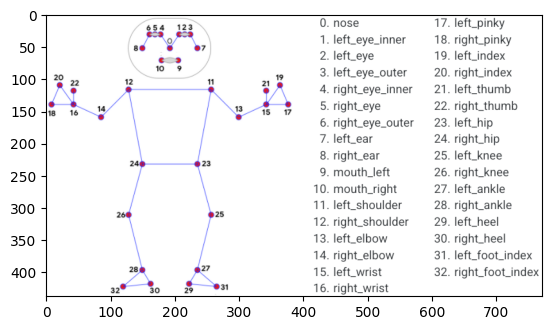

In [3]:
import matplotlib.pyplot as plt

img=cv2.imread(r'D:\DL projects\mediapipe project\body_pose_index.png')
con_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(con_img)

In [4]:
def calculate_angle(a,b,c):
    a=np.array(a)    #shoulder
    b=np.array(b)    #elbow
    c=np.array(c)     #wrist
    
    radian=np.arctan2(c[1]-b[1],c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0])
    angle=np.abs(radian*180.0/np.pi)

    if angle>180.0:
        angle=360-angle
    
    return angle

In [5]:
video = cv2.VideoCapture(0)

# Initialize counters and flags
left_counter = 0
right_counter = 0
left_curl_detected = False
right_curl_detected = False

while True:
    success, image = video.read()
    if not success:
        print("Ignoring empty camera frame.")
        continue
    
    # Convert image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Process image with pose detection
    results = pose.process(image)
    
    # Convert image back to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.pose_landmarks:
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Left hand
            shoulder1 = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow1 = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist1 = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            # Right hand
            shoulder2 = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow2 = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist2 = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

            # Calculate angles
            angle1 = calculate_angle(shoulder1, elbow1, wrist1)
            angle2 = calculate_angle(shoulder2, elbow2, wrist2)

            # Display angles
            cv2.putText(image, str(angle1), tuple(np.multiply(elbow1, [640, 480]).astype(int)), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, str(angle2), tuple(np.multiply(elbow2, [640, 480]).astype(int)), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            # Counters
            if angle1 < 30 and not left_curl_detected:
                left_counter += 1
                print('left counter:', left_counter)
                left_curl_detected = True
            elif angle1 >= 30:
                left_curl_detected = False

            if angle2 < 30 and not right_curl_detected:
                right_counter += 1
                print('right counter:', right_counter)
                right_curl_detected = True
            elif angle2 >= 30:
                right_curl_detected = False

            # Draw left counter box
            cv2.rectangle(image, (10, 10), (140, 50), (255, 255, 255), -1)
            cv2.putText(image, f'Left Counter: {left_counter}', (15, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

            # Draw right counter box
            cv2.rectangle(image, (450, 10), (600, 50), (255, 255, 255), -1)
            cv2.putText(image, f'Right Counter: {right_counter}', (465, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

        except Exception as e:
            print(e)
            
        # Draw pose landmarks
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(0, 255, 255), thickness=2, circle_radius=3),
                                  mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=2))

    cv2.imshow('Body Pose', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and destroy windows
video.release()
cv2.destroyAllWindows()

right counter: 1
left counter: 1
right counter: 2
right counter: 3
left counter: 2
right counter: 4
right counter: 5
left counter: 3
left counter: 4
right counter: 6
left counter: 5
